In [1]:
import pandas as pd
import cv2 as cv
import torch
import numpy as np

# model = torch.hub.load('ultralytics/yolov5', 'custom', 'runs/train/exp2/weights/best.pt')
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

locx_base = []
locy_base = []

vidcap = cv.VideoCapture('../video/walk.mp4')
success, image = vidcap.read()
count = 0
while success:
    results = model(image)
    # results.print()
    # print(results.pandas().xyxy[0])
    
    locations = results.pandas().xyxy[0]
    try:
        locations = results.pandas().xyxy[0]
        obj = locations.loc[locations['name'] == 'person']
        obj_x = obj.iloc[0]['xmin']
        obj_y = obj.iloc[0]['ymin']
        obj_x = float(obj_x)
        obj_y = float(obj_y)
        print('flame=%d'%count,end=' ')
        print(obj_x, obj_y)

        locx_base.append(obj_x)
        locy_base.append(obj_y)
        x_arr = np.array(locx_base)
        y_arr = np.array(locy_base)
    except:
        pass
    success, image = vidcap.read()
    count += 1


import matplotlib.pyplot as plt
plt.plot(x_arr)
plt.show()

Using cache found in C:\Users\LaoZhu/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-1 Python-3.8.8 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Obj doesn't exist in this flame.
FPS:  7.1674592907908075
Obj doesn't exist in this flame.
FPS:  38.35563724817792
Obj doesn't exist in this flame.
FPS:  31.23853217842061
Obj doesn't exist in this flame.
FPS:  36.730922147298365
Obj doesn't exist in this flame.
FPS:  38.45762540916718
Obj doesn't exist in this flame.
FPS:  37.03612393928423
Obj doesn't exist in this flame.
FPS:  31.228531010349194
Obj doesn't exist in this flame.
FPS:  29.265716797610906
Obj doesn't exist in this flame.
FPS:  31.23411226784624
Obj doesn't exist in this flame.
FPS:  41.666789187685644
Obj doesn't exist in this flame.
FPS:  43.485018765421856
Obj doesn't exist in this flame.
FPS:  41.66554745395665
Obj doesn't exist in this flame.
FPS:  37.03612393928423
Obj doesn't exist in this flame.
FPS:  36.2913829354607
Obj doesn't exist in this flame.
FPS:  37.03841330954946
Obj doesn't exist in this flame.
FPS:  41.664305794236554
Obj doesn't exist in this flame.
FPS:  41.62543790875619
Obj doesn't exist in this

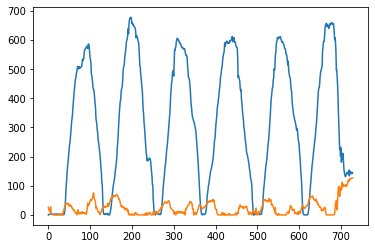

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_arr)
plt.plot(y_arr)
plt.show()

In [6]:
# locations[locations['name']=='person']
obj_width = obj.iloc[0]['xmax'] - obj_x
type(obj_width)

numpy.float64

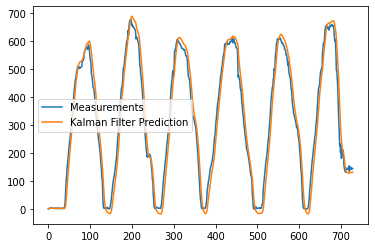

In [48]:
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0

    def predict(self, u = 0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
            (I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

def example():
    dt = 1.0/60
    F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
    H = np.array([1, 0, 0]).reshape(1, 3)
    Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
    R = np.array([0.5]).reshape(1, 1)

    # x = np.linspace(-10, 10, 100)
    # measurements = - (x**2 + 2*x - 2)  + np.random.normal(0, 2, 100)
    measurements = x_arr

    kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
    predictions = []

    for z in measurements:
        predictions.append(np.dot(H,  kf.predict())[0])
        # print(predictions[-1])
        kf.update(z)

    import matplotlib.pyplot as plt
    plt.plot(range(len(measurements)), measurements, label = 'Measurements')
    plt.plot(range(len(predictions)), np.array(predictions), label = 'Kalman Filter Prediction')
    plt.legend()
    plt.show()
if __name__ == '__main__':
    example()

In [1]:
import pandas as pd
import cv2 as cv
import torch
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0

    def predict(self, u = 0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
            (I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)


# model = torch.hub.load('ultralytics/yolov5', 'custom', 'runs/train/exp2/weights/best.pt')
model = torch.hub.load('ultralytics/yolov5', 'yolov5l')

dt = 1.0/60
F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
H = np.array([1, 0, 0]).reshape(1, 3)
Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
R = np.array([0.5]).reshape(1, 1)
kf_x = KalmanFilter(F=F, H=H, Q=Q, R=R)
kf_y = KalmanFilter(F=F, H=H, Q=Q, R=R)

locx_base = []
locy_base = []

vidcap = cv.VideoCapture('../video/walk.mp4')
success, image = vidcap.read()
count = 0
predictions_x = []
predictions_y = []
while success:
    results = model(image)
    # results.print()
    # print(results.pandas().xyxy[0])
    
    locations = results.pandas().xyxy[0]
    try:
        locations = results.pandas().xyxy[0]
        obj = locations.loc[locations['name'] == 'person']
        obj_x = obj.iloc[0]['xmin']
        obj_y = obj.iloc[0]['ymin']
        obj_x = float(obj_x)
        obj_y = float(obj_y)

        locx_base.append(obj_x)
        locy_base.append(obj_y)
        x_arr = np.array(locx_base)
        y_arr = np.array(locy_base)
    except:
        print('Obj doesn\'t exist in this flame.')

    predictions_x.append(float(np.dot(H, kf_x.predict())[0]))
    predictions_y.append(float(np.dot(H, kf_y.predict())[0]))
    kf_x.update(obj_x)
    kf_y.update(obj_y)

    print('flame=%d'%count,end=' ')
    print(obj_x, obj_y, float(np.dot(H, kf_x.predict())[0]), float(np.dot(H, kf_y.predict())[0]))       


    
    success, image = vidcap.read()
    count += 1




Using cache found in C:\Users\LaoZhu/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-1 Python-3.8.8 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients
Adding AutoShape... 


flame=0 0.861968994140625 18.506011962890625 0.5845820897370124 12.550663909611364
flame=1 0.7912445068359375 16.102203369140625 0.6831874489093896 14.249261610989361
flame=2 1.0003662109375 10.97705078125 0.8156079005602442 12.939336830894048
flame=3 1.4027252197265625 8.676177978515625 1.050072195143115 11.280839686663851
flame=4 1.88372802734375 6.785369873046875 1.3821889620131562 9.516247276731601
flame=5 1.6312713623046875 4.241485595703125 1.4963368139384645 7.40717831617089
flame=6 0.3118896484375 3.05035400390625 1.058270101261238 5.592483892338906
flame=7 0.5386962890625 1.96337890625 0.8634916150912979 4.007773664223397
flame=8 0.4541473388671875 0.322998046875 0.7051186642651464 2.3583021228868746
flame=9 0.0456695556640625 0.0 0.444609032411621 1.181151636344375
flame=10 0.19549560546875 0.0 0.3357127268166535 0.43498348610874926
flame=11 1.129974365234375 0.0 0.6293243277446501 -0.03341635523531636
flame=12 1.762298583984375 0.579986572265625 1.0638085486993367 -0.0978944

In [3]:
import matplotlib.pyplot as plt
plt.plot(x_arr, label='Measurements')
# plt.plot(predictions_x, label='Kalman Filter Prediction')
plt.xlabel('flames')
plt.ylabel('pixels')
# plt.title('X-index Kalman Predictions')
plt.title('X-index')
plt.legend()
plt.savefig('index_x_without.png',dpi=2000)
plt.close()

plt.plot(y_arr, label='Measurements')
# plt.plot(predictions_y, label='Kalman Filter Prediction')
plt.xlabel('flames')
plt.ylabel('pixels')
# plt.title('Y-index Kalman Predictions')
plt.title('Y-index')
plt.legend()
plt.savefig('index_y_without.png',dpi=2000)
plt.close()
# plt.show()

In [15]:
import time

time_start = time.time()
for i in range(100000):
    pass
time_end = time.time()
print(1/(time_end-time_start))

330.62462557149615


In [9]:
float(np.dot(H, kf_y.predict())[0])

127.91610675856381

In [12]:
import cv2 as cv
# vidcap = cv.VideoCapture('../video/walk.avi')
vidcap = cv.VideoCapture('../video/walk.mp4')
success, image = vidcap.read()
print(success)

True


In [1]:
import numpy as np
import cv2 as cv
import torch
import pandas as pd
import time
from Kalmantool import KalmanFilter

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# cap = cv.VideoCapture(0)
cap = cv.VideoCapture('../video/walk.mp4')
# out = cv.VideoWriter('../video/output.avi', -1, 20.0, (640,480))
# out = cv.VideoWriter("output.avi", cv.VideoWriter_fourcc(*"MJPG"), 30,(640,480))
out = cv.VideoWriter('output.avi', -1, 20.0, (640,480))


# set Kalman
dt = 1.0/30
F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
H = np.array([1, 0, 0]).reshape(1, 3)
Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
R = np.array([0.5]).reshape(1, 1)
kf_x = KalmanFilter(F=F, H=H, Q=Q, R=R)
kf_y = KalmanFilter(F=F, H=H, Q=Q, R=R)
locx_base = []
locy_base = []
predictions_x = []
predictions_y = []

if not cap.isOpened():
    print('Cannot open camera')
    exit()
while True:
    time_start = time.time()
    ret, image = cap.read()
    if not ret:
        print('Cannot receive frame')
        break

    results = model(image)
    locations = results.pandas().xyxy[0]
    try:
        # get locations
        obj = locations.loc[locations['name'] == 'person']
        obj_x = obj.iloc[0]['xmin']
        obj_y = obj.iloc[0]['ymin']
        obj_width = obj.iloc[0]['xmax'] - obj_x
        obj_height = obj.iloc[0]['ymax'] - obj_y
        obj_x = float(obj_x)
        obj_y = float(obj_y)
        kf_x.update(obj_x)
        kf_y.update(obj_y)
        # after Kalman
        next_x = float(np.dot(H, kf_x.predict())[0])
        next_y = float(np.dot(H, kf_y.predict())[0])
        # visualize
        cv.rectangle(image,(int(obj_x),int(obj_y)),(int(obj_x+obj_width),int(obj_y+obj_height)),(0,255,0),2)
        cv.rectangle(image,(int(next_x),int(next_y)),(int(next_x+obj_width),int(next_y+obj_height)),(255,255,255),2)
        
        # # save data
        # locx_base.append(obj_x)
        # locy_base.append(obj_y)
        # x_arr = np.array(locx_base)
        # y_arr = np.array(locy_base)
        # predictions_x.append(next_x)
        # predictions_y.append(next_y)

    except:
        print('Obj doesn\'t exist in this flame.')
        pass
    
    cv.imshow('obj',image)
    out.write(image)



    time_end = time.time()
    process_time = time_end - time_start
    try:
        fps = 1 / process_time
    except:
        fps = 0
    print(fps)

    if cv.waitKey(1) == 'q':
        break

cap.release()
out.release()
cv.destroyAllWindows()


In [2]:
import numpy as np
from scipy.fft import fft

# Generate some example data
data = np.sin(np.linspace(0, 20*np.pi, 1000))

# Perform the FFT on the data
fft_data = fft(data)

# Find the power spectrum of the FFT data
power_spectrum = np.abs(fft_data)**2

# Find the frequency corresponding to the maximum power in the spectrum
max_power_idx = np.argmax(power_spectrum[1:len(power_spectrum)//2]) + 1
frequency = max_power_idx / len(data)

# Calculate the period of the data in seconds
period = 1 / frequency

print("The period of the data is approximately", period, "seconds.")

The period of the data is approximately 100.0 seconds.
